# Group 4 Project 2: ETL with Airline Data
---
To get started please CD in your Terminal to your projects /Resources directory and paste the following code:

mongoimport --type csv -d airline_data -c fuel_prices --headerline --drop fuel_prices_since_2000.csv

mongoimport --type csv -d airline_data -c fare_prices --headerline --drop average_daily_fares.csv




In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# Imports dependencies : mongo database, pretty printing tool, pandas, and the datetime library
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
# Sets up the mongo client to a variable
mongo = MongoClient(port=27017)

In [4]:
# Checks to make sure new database has been added
pprint(mongo.list_database_names())

['admin',
 'airline_data',
 'classDB',
 'config',
 'fruits_db',
 'gardenDB',
 'local',
 'met',
 'petsitly_marketing',
 'uk_food']


In [5]:
# Sets the database to a variable
plane_data = mongo['airline_data']

In [6]:
# Pulls example entry from fuel_prices collection
pprint(plane_data.fuel_prices.find_one())

{'_id': ObjectId('641d0a7634dc41a83b11f385'),
 'date': '2023-03-13',
 'price ($/Gal)': 2.773}


In [7]:
# Pulls example entry from fare_prices collection
pprint(plane_data.fare_prices.find_one())

{'': 'ORD',
 '0': 409.26,
 '1': 374.32,
 '10': 355.73,
 '11': 378.78,
 '12': 385.05,
 '13': 400.51,
 '14': 415.75,
 '15': 359.19,
 '16': 317.98,
 '17': 317.14,
 '18': 338.55,
 '19': 344.89,
 '2': 338.23,
 '20': 276.92,
 '21': 284.93,
 '3': 339.96,
 '4': 320.58,
 '5': 313.59,
 '6': 330.82,
 '7': 326.17,
 '8': 361.46,
 '9': 328.7,
 '_id': ObjectId('641d0a8b46efa5816b1e29a5')}


In [8]:
# Sets the fuel_prices collection to a variable
fuel_prices = plane_data['fuel_prices']

In [9]:
# Sets up a Pandas DataFrame for fuel price
fuel_prices_df = pd.DataFrame(list(fuel_prices.find())).drop('_id', axis=1)

In [10]:
# Sets up a Pandas DataFrame for fare prices
fare_prices = plane_data['fare_prices']

In [11]:
# Sets up a Pandas DataFrame for fare price
fare_prices_df = pd.DataFrame(list(fare_prices.find()))

fare_prices_df = fare_prices_df.rename(columns={'_id': 'ID', '':'Airport', '0': '2000', '1': '2001', '2':'2002',
                                                '3':'2003', '4':'2004','5':'2005','6':'2006','7':'2007','8':'2008',
                                                '9': '2009', '10': '2010','11': '2011','12': '2012','13':'2013',
                                                '14': '2014','15': '2015', '16': '2016','17': '2017','18': '2018',
                                                '19': '2019','20':'2020','21':'2021'})
fare_prices_df = fare_prices_df.drop('ID', axis=1)
fare_prices_df.head(5)

,Airport,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,ORD,409.26,374.32,338.23,339.96,320.58,313.59,330.82,326.17,361.46,...,385.05,400.51,415.75,359.19,317.98,317.14,338.55,344.89,276.92,284.93
1,ATL,339.23,328.77,305.63,304.49,294.35,312.56,350.75,357.78,351.23,...,365.82,397.86,424.95,390.24,350.96,350.91,360.85,370.49,299.23,303.74
2,EWR,449.52,421.09,399.04,407.35,389.71,385.84,379.69,379.98,428.99,...,477.06,487.50,492.22,472.14,429.75,401.20,403.74,407.21,305.94,313.97
3,SEA,336.56,319.69,311.93,320.81,316.60,328.96,353.61,354.13,353.61,...,382.80,380.51,379.42,367.00,332.40,335.44,337.31,336.51,287.04,308.81
4,DFW,441.85,413.06,386.03,393.59,369.48,368.89,389.36,364.99,406.16,...,430.71,415.66,425.24,383.25,348.99,362.79,383.43,402.57,323.76,319.66


In [12]:
# Sets up a Pandas Series using list comprehension of yearly average prices from the 10 busiest US airports

fare_years = [fare_prices_df.iloc[:,i].mean() for i in range(1, len(fare_prices_df.columns))]

fare_price = pd.Series(fare_years, index=['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                                          '2010','2011','2012','2013','2014','2015', '2016','2017','2018','2019',
                                          '2020','2021'], name='fare price')

In [13]:
# Sets up a Series for fuel prices, averages are grouped by all possible days for each year (about 250 / year)
fuel_prices_df['date'] = pd.to_datetime(fuel_prices_df['date'])
fuel = fuel_prices_df.groupby(fuel_prices_df['date'].dt.year)['price ($/Gal)'].mean()
fuel.drop(fuel.tail(2).index, inplace = True)

fuel_years = [value for index, value in fuel.items()]

fuel_price = pd.Series(fuel_years, index=['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                                          '2010','2011','2012','2013','2014','2015', '2016','2017','2018','2019',
                                          '2020','2021'], name='fuel price')

In [14]:
# Combines average fare prices with average fuel prices, 2000-21
fare_fuel_comparison_df =  pd.concat([fare_price, fuel_price], axis=1)
fare_fuel_comparison_df

,fare price,fuel price
2000,371.717,0.849952
2001,350.405,0.724988
2002,332.142,0.687064
2003,332.255,0.823600
2004,314.411,1.151137
2005,321.474,1.715598
2006,336.910,1.923020
2007,336.068,2.130913
2008,357.322,2.964447
2009,317.719,1.664290


In [15]:
# Divides fare price by fuel price to show a real decrease in air fares vs. price of jet fuel
fare_fuel_comparison_df['fare price / fuel price'] = fare_fuel_comparison_df['fare price']/fare_fuel_comparison_df['fuel price']
fare_fuel_comparison_df

,fare price,fuel price,fare price / fuel price
2000,371.717,0.849952,437.338814
2001,350.405,0.724988,483.325241
2002,332.142,0.687064,483.422214
2003,332.255,0.823600,403.417921
2004,314.411,1.151137,273.130934
2005,321.474,1.715598,187.383101
2006,336.910,1.923020,175.198379
2007,336.068,2.130913,157.710825
2008,357.322,2.964447,120.535818
2009,317.719,1.664290,190.903665


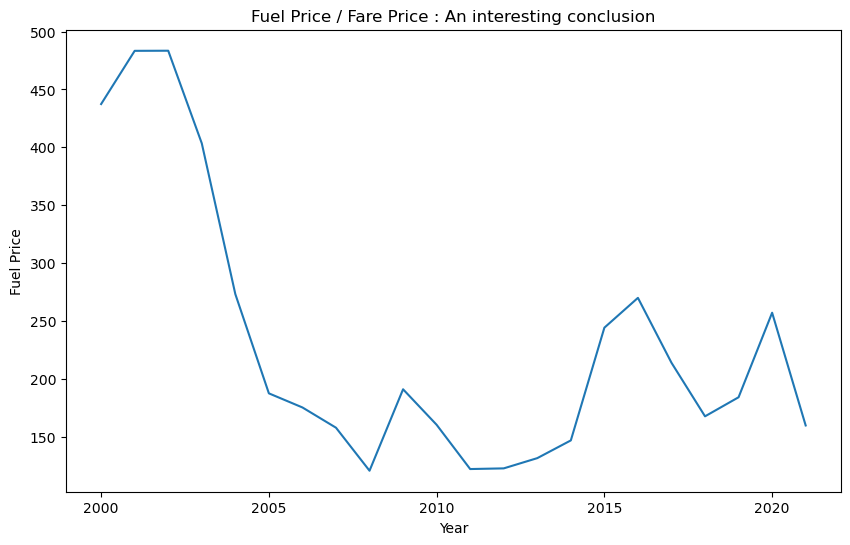

In [16]:
fare_fuel_comparison_df['fare price / fuel price'].plot(figsize = [10,6])
plt.title('Fuel Price / Fare Price : An interesting conclusion')
plt.ylabel('Fuel Price')
plt.xlabel('Year')
plt.show()



While glancing at the dataframe you can see that fare prices, in nominal terms, have dropped but the difference is even more pronounced when you plot the nominal price over fuel costs. While lows were reached in 2007, this ratio, during 2020 and 2021, was again falling precipitously. While listing all factors affecting the economy during this time is past the scope of our analysis, a few things can be seen in this macro-level plot:

* Towards the end of the 2000 tech crash and after 9/11, this ratio fell to a low extreme.
* During the Great Financial Crisis of 2008-2011, the ratio remained low but started to recover around 2013.
* During the COVID crises and subsequent inflation, the ratio has fallen but without 2022 and 2023 data, additional research would be needed to determine the current direction. 
